In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


# constants
G = 1.0
M = 1.0
m = 1.0

In [ ]:

def read_simulation_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        time_step = float(lines[0])
        method_name = lines[1]
        positions_string = lines[2]
        velocities_string = lines[3]
        energy_string = lines[4]
        angular_moments_string = lines[5]
        
        
        # split the positions
        positions_str = np.array([pos.split(';') for pos in positions_string.split(' ')[:-1]])
        velocities_str = np.array([vel.split(';') for vel in velocities_string.split(' ')[:-1]])
        
        x_positions = positions_str[:,0].astype(float)
        y_positions = positions_str[:,1].astype(float)
        
        x_velocities = velocities_str[:,0].astype(float)
        y_velocities = velocities_str[:,1].astype(float)
        
        energies = [float(en) for en in energy_string.split(';')[:-1]]
        angular_moments = [float(am) for am in angular_moments_string.split(';')[:-1]]
        
        
        
        
        return time_step, method_name, x_positions, y_positions, x_velocities, y_velocities, energies, angular_moments
    
def plot_result(time_step, method_name, x_pos, y_pos, x_vel, y_vel, energies, ang_mom):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # --- Left: orbital trajectory ---
    axs[0].plot(x_pos, y_pos, label=method_name, linestyle=':', color='blue', alpha=0.5)
    axs[0].scatter(0, 0, color='orange', label='Central Mass (M)', s=50)
    axs[0].scatter(x_pos[0], y_pos[0], color='red', label='Initial Position', s=25)
    axs[0].scatter(x_pos[-1], y_pos[-1], color='blue', label='Final Position', s=25)
    axs[0].set_xlabel('x-position')
    axs[0].set_ylabel('y-position')
    axs[0].set_title('Orbital Trajectory | ' + method_name + ' | ' + str(time_step))
    axs[0].axis('equal')
    axs[0].grid()
    axs[0].legend()

    # --- Right: energy & angular momentum ---
    time = np.linspace(0, 1, len(x_pos))
    axs[1].plot(time, energies, label='Total Energy')
    axs[1].plot(time, ang_mom, label='Angular Momentum')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Energy and Angular Momentum | ' + str(time_step))
    axs[1].grid()
    axs[1].legend()

    plt.tight_layout()
    plt.show()

Plotting results from explicit_euler_0.001000.txt


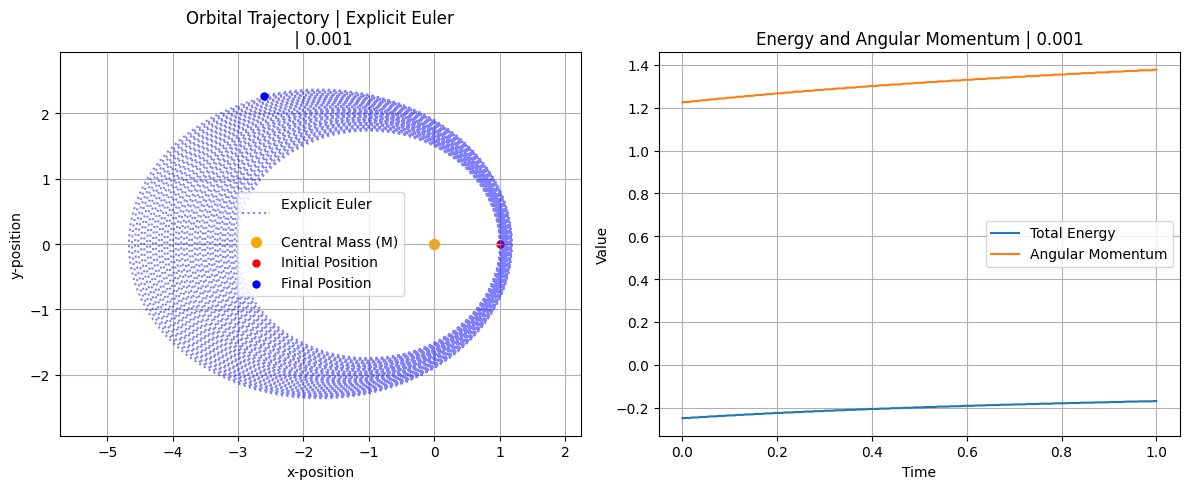

Plotting results from explicit_euler_0.010000.txt


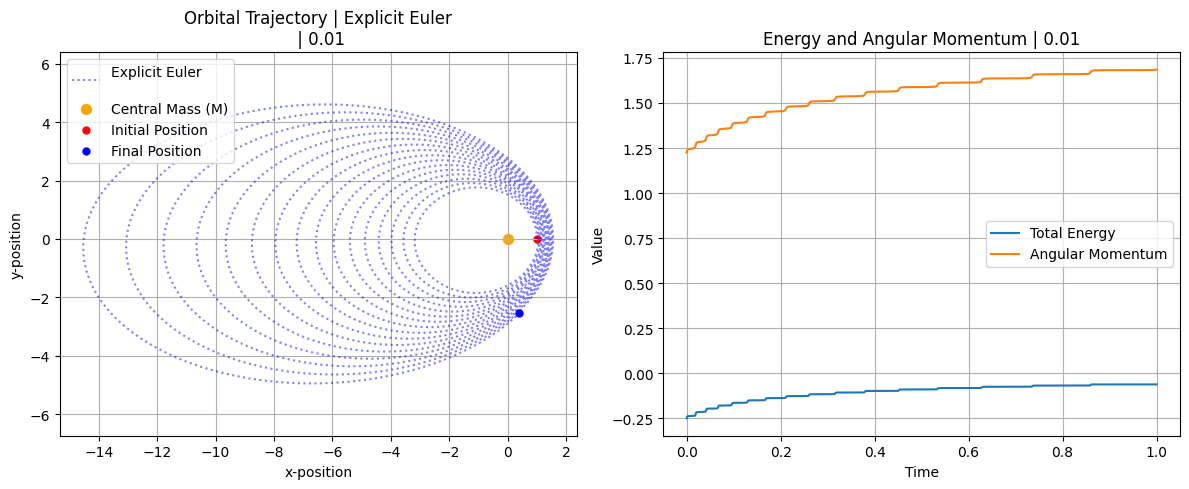

Plotting results from explicit_euler_0.100000.txt


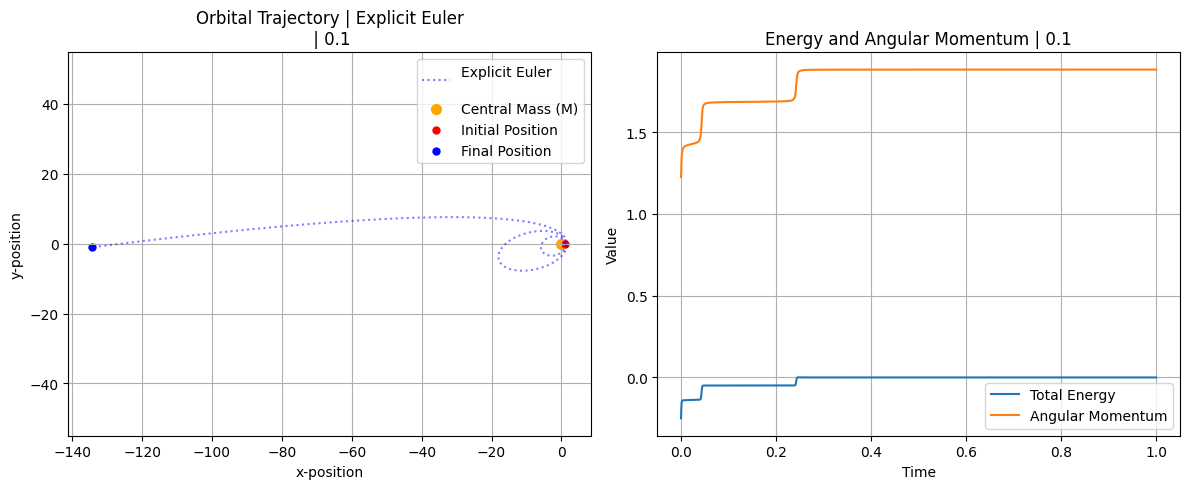

Plotting results from explicit_euler_1.000000.txt


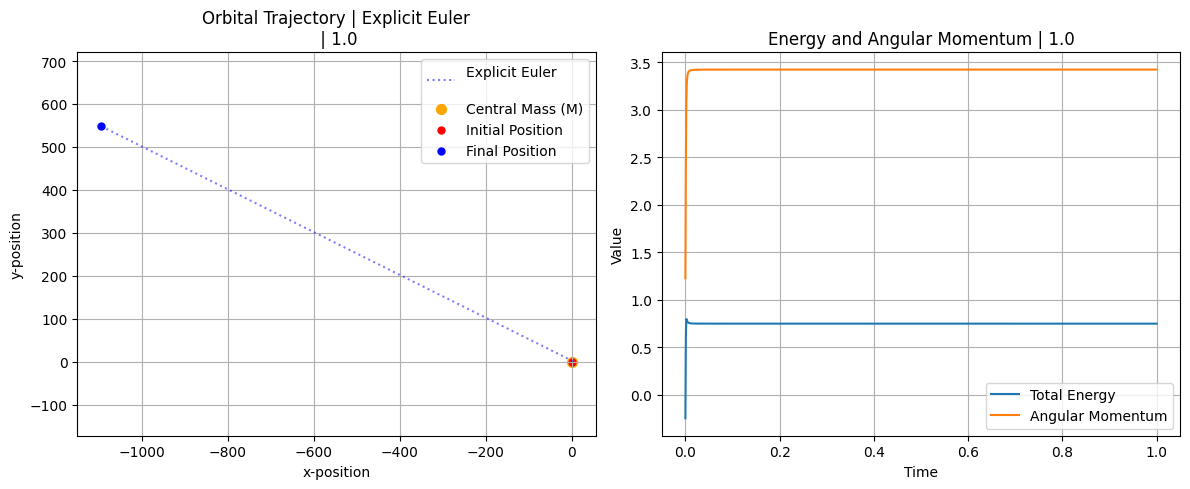

In [ ]:
# sort the output files
files = sorted(os.listdir('results/'))
for file in files:
    if file.endswith('.txt') and "explicit_euler" in file:
        print(f'Plotting results from {file}')
        plot_result(*read_simulation_data("results/" + file))

Plotting results from runge_kutta_2_0.001000.txt


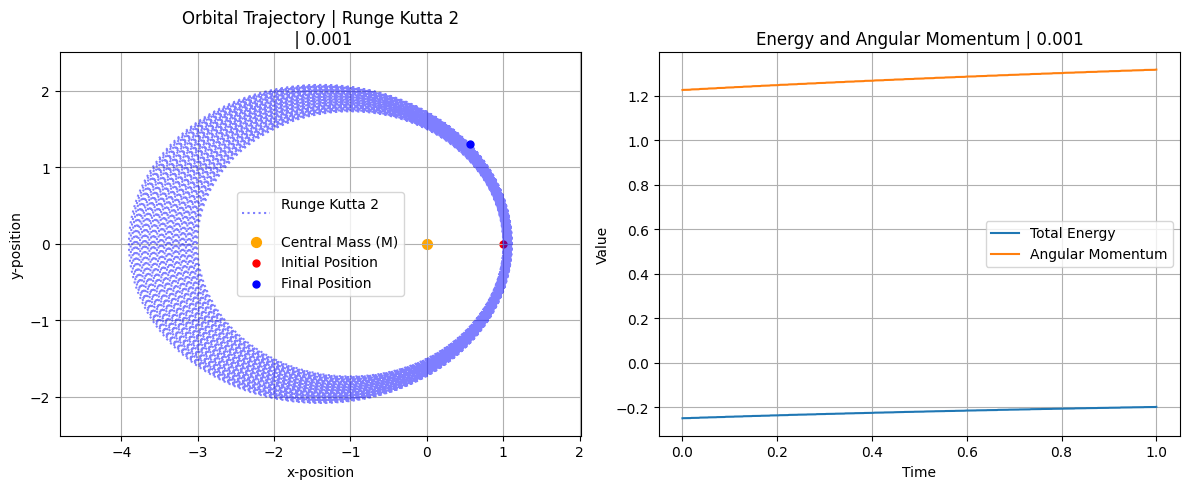

Plotting results from runge_kutta_2_0.010000.txt


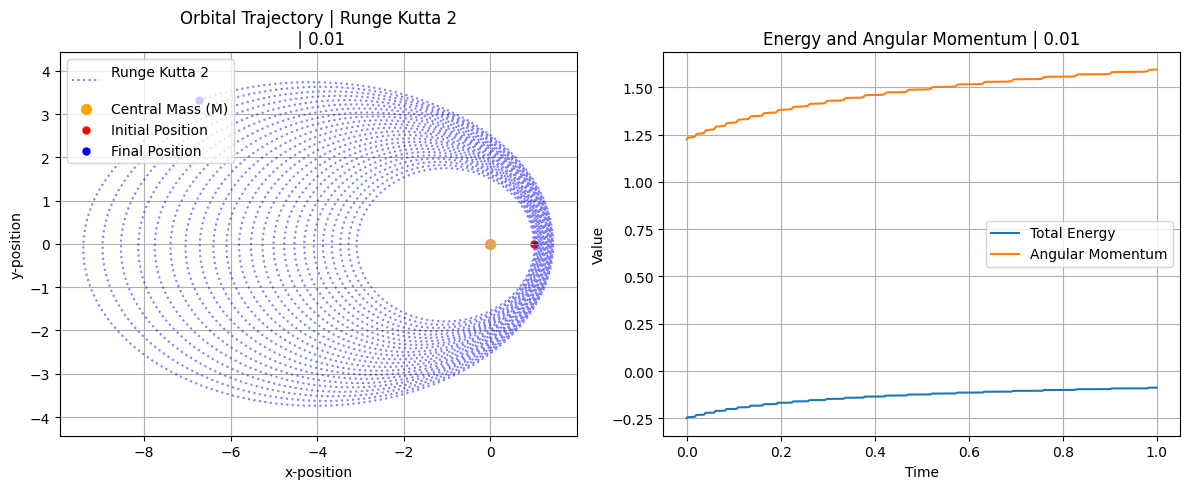

Plotting results from runge_kutta_2_0.100000.txt


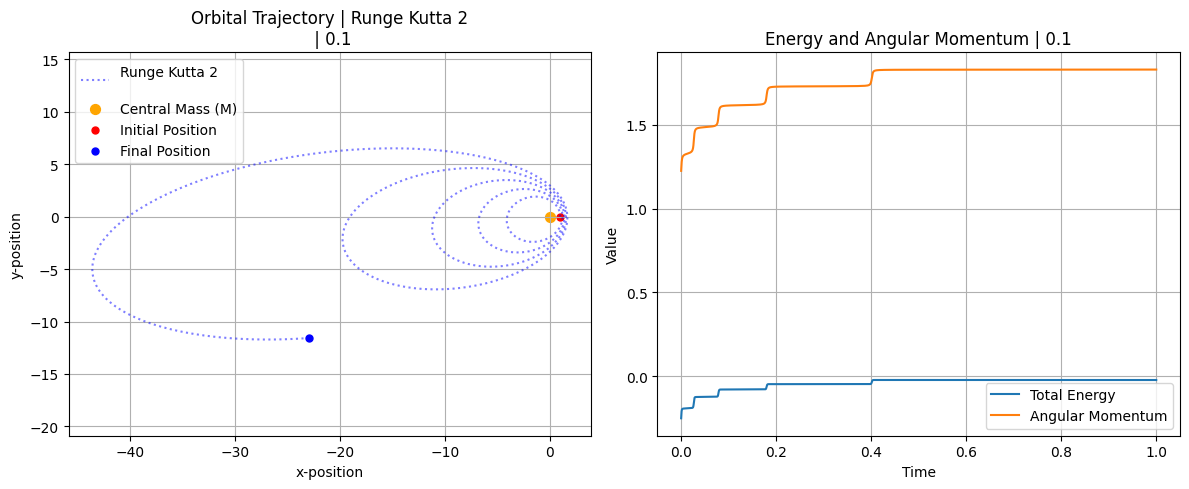

Plotting results from runge_kutta_2_1.000000.txt


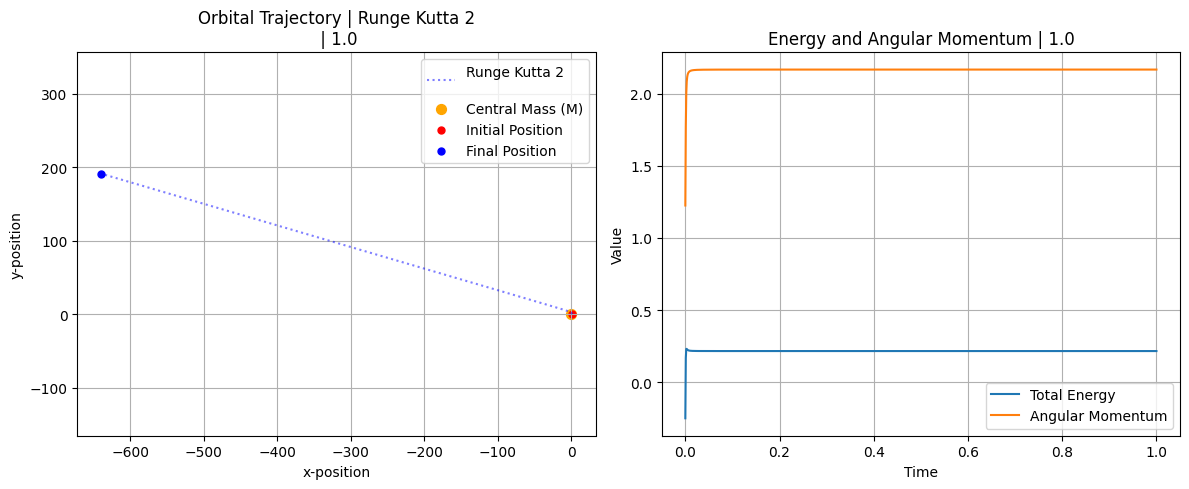

In [10]:
files = sorted(os.listdir('results/'))
for file in files:
    if file.endswith('.txt') and "runge_kutta_2" in file:
        print(f'Plotting results from {file}')
        plot_result(*read_simulation_data("results/" + file))

In [ ]:
files = sorted(os.listdir('results/'))
for file in files:
    if file.endswith('.txt') and "runge_kutta_4" in file:
        print(f'Plotting results from {file}')
        plot_result(*read_simulation_data("results/" + file))

In [7]:
for file in files:
    if file.endswith('.txt') and "leap_frog_" in file:
        print(f'Plotting results from {file}')
        plot_result(*read_simulation_data("results/" + file))

In [8]:
for file in files:
    if file.endswith('.txt') and "semi_implicit_euler_" in file:
        print(f'Plotting results from {file}')
        plot_result(*read_simulation_data("results/" + file))